# QS engine validation

In [1]:
import math as m
import numpy as np

electron_mass = 9.10938356e-31
elementary_charge = 1.6021766208e-19
speed_of_light = 299792458
reduced_plank = 1.054571800e-34
vacuum_permittivity =  8.854187817e-12
fine_structure_constant =  0.0072973525664

classical_elec_radius = (1./4./np.pi/vacuum_permittivity)*( elementary_charge**2 / (electron_mass * speed_of_light**2))

tau_e = classical_elec_radius/speed_of_light

lambda_laser = 1.0e-6

schwinger_field_SI = electron_mass**2 * speed_of_light**3 / (reduced_plank*elementary_charge)

schwinger_field_code_units = electron_mass*speed_of_light*lambda_laser/(2.0*reduced_plank*m.pi)

conversion_of_rate_from_code_to_SI = (2.0 * m.pi * speed_of_light)/lambda_laser

conversion_of_rate_from_SI_to_code = 1.0/conversion_of_rate_from_code_to_SI

field_reference_PIC = 2.0 * np.pi * electron_mass * speed_of_light * speed_of_light / (elementary_charge*lambda_laser)


0.11586593933804681
1.8479420956273204e-31
0.0

21.82693639032425
0.005651238787235672
2.2685519516830914e-260

20.55416605907147
1.9245303609391278
2.376079180617236e-26

10.74503711441692
1.920678223127885
0.0021746338710305893

5.108747823281634
1.0120166029693047
0.1717705431703861

2.3834091215328597
0.4818744514855814
0.1242403493715986

1.1074943786268194
0.22488024060113704
0.060022477595616165



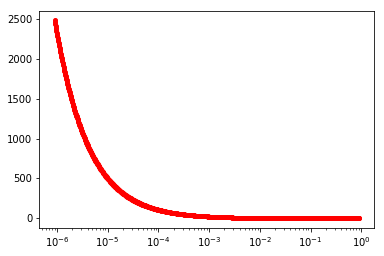

In [49]:
import scipy.special as spe
import scipy.integrate as integ


def inner(x):
    return integ.quad(lambda s: spe.kv(5./3., s), x, np.inf)[0] 

def y(chi_ele, chi_phot):
    return 2*chi_phot/3/chi_ele/(chi_ele-chi_phot)

def KK_integ(chi_ele, chi_phot):
    if(chi_ele == 0 or chi_phot == 0 or chi_phot >= chi_ele):
        return 0
    yy = y(chi_ele, chi_phot)
    ccoef = 1.0/np.sqrt(3)/np.pi   
    return ccoef*(inner(yy) + (3/2)*chi_phot*yy*spe.kv(2./3., yy))/chi_ele

KK_integ = np.vectorize(KK_integ)

def KK(chi_ele):
    return integ.quad(lambda s: KK_integ(chi_ele, s), 0.00001, chi_ele)[0] 

frac = [0.01,0.1,0.9]
chi = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
       
for cchi in chi :
    for ffrac in frac :
        print(KK_integ(cchi, cchi*ffrac))
    print("")
    
frac = np.logspace(-5, 1.0, num=1000, base=10)
res = KK_integ(0.09, frac*0.09)


import matplotlib.pyplot as plt
plt.semilogx(frac*0.09, res, 'ro', label='From BW library', markersize=4)
plt.show()